<a href="https://colab.research.google.com/github/mhdadizadeh/CICDDoS2019/blob/master/CICDDoS2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here are the keywords in the paragraph:

**Techniques:**

* Ensemble Learning
* Machine Learning
* K-Nearest Neighbors (KNN)
* Random Forest
* Boosting
* Voting
* AdaBoost

**Data:**

* Historical network traffic data
* Labeled datasets
* DDoS attacks

**Cloud Platforms:**

* AWS
* Google Cloud

**Other:**

* Distributed Denial of Service (DDoS) attacks
* Model hybridization
* Feature weights
* Threshold values
* Scalability
* Cloud monitoring
* Auto-scaling
* False positives
* False negatives

**Concepts:**

* DDoS detection
* Model accuracy
* Adaptability
* Comprehensive learning
* Scalable deployment
* Continuous threat detection

# Read the file from source

In [ ]:
!wget http://205.174.165.80/CICDataset/CICDDoS2019/Dataset/CSVs/CSV-03-11.zip

--2024-04-27 17:30:10--  http://205.174.165.80/CICDataset/CICDDoS2019/Dataset/CSVs/CSV-03-11.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918815761 (876M) [application/zip]
Saving to: ‘CSV-03-11.zip’

CSV-03-11.zip       100%[===================>] 876.25M  1.89MB/s    in 7m 49s  

2024-04-27 17:38:00 (1.87 MB/s) - ‘CSV-03-11.zip’ saved [918815761/918815761]



In [ ]:
!unzip CSV-03-11.zip

Archive:  CSV-03-11.zip
   creating: 03-11/
  inflating: 03-11/UDPLag.csv        
  inflating: 03-11/UDP.csv           
  inflating: 03-11/.~lock.UDPLag.csv#  
  inflating: 03-11/LDAP.csv          
  inflating: 03-11/MSSQL.csv         
  inflating: 03-11/NetBIOS.csv       
  inflating: 03-11/Portmap.csv       
  inflating: 03-11/Syn.csv           


# import libraries

In [ ]:
import pandas as pd
import numpy as np
import random
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz

time: 7.26 s (started: 2024-04-27 17:59:15 +00:00)


# functions

K-Fold Decision Tree

In [ ]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


def k_Fold_DecisionTree(x_data, y_data):


  print('K-Fold Decision Tree: ')
  #Loading the dataset
  # X = df_6.drop([' Label'], axis = 1)
  X = x_data
  y = y_data


  #Implementing cross validation
  k = 10
  kf = KFold(n_splits=k, random_state=None)

  acc_score = []
  count = 0
  for train_index , test_index in kf.split(X):
      X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
      y_train , y_test = y[train_index] , y[test_index]

      dtree = DecisionTreeClassifier()
      dtree.fit(X_train,y_train)

      feat_importance = dtree.tree_.compute_feature_importances(normalize=True)
      featuers = X_train.columns

      feature_importance = pd.DataFrame({'feature' : featuers, 'importance': feat_importance}).sort_values(by='importance', ascending = False).head(8)
      score = dtree.score(X_test,y_test)

      print('k' + str(count) + ' - accuracy: ' + str(score))
      count +=1

      pred = dtree.predict(X_test)
      # print(classification_report(y_test,pred))

      acc = dtree.score(X_test,y_test)
      acc_score.append(acc)


  avg_acc_score = sum(acc_score)/k
  print('\nAvg accuracy : {}'.format(avg_acc_score))


time: 357 ms (started: 2024-04-27 17:59:26 +00:00)


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def DecisionTree(x,y):

  data_X = x
  data_y = y

  k_Fold_DecisionTree(data_X, data_y)

  print('\nGeneral Decision Tree: ')

  X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.30, random_state=101)

  dtree = DecisionTreeClassifier()
  dtree.fit(X_train,y_train)

  feat_importance = dtree.tree_.compute_feature_importances(normalize=True)
  featuers = X_train.columns

  feature_importance = pd.DataFrame({'feature' : featuers, 'importance': feat_importance}).sort_values(by='importance', ascending = False).head(8)
  score = dtree.score(X_test,y_test)

  print('accuracy: ' + str(score) + '\n\n')

  pred = dtree.predict(X_test)
  print(classification_report(y_test,pred))
  print('\n\n')

  df_eval = pd.DataFrame({'Label': y_test,'Predicrions':pred}).reset_index(drop=True)
  print(df_eval.head(20))
  print( '\n\n')

  feature_importance.set_index('feature').plot(kind='bar', title='Feature Importance Plot')

  visualize_confusion_matrix(y_true=y_test, y_pred=pred)

  visualize_tree(dtree, X_train.columns)

  return score

time: 10.5 ms (started: 2024-04-27 17:59:31 +00:00)


In [ ]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dthadi.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

time: 1.03 ms (started: 2024-04-27 17:59:36 +00:00)


visualize_confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def visualize_confusion_matrix(y_true, y_pred):
  conf_matrix = confusion_matrix(y_true, y_pred)
  # Print the confusion matrix using Matplotlib
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

time: 2.78 ms (started: 2024-04-27 17:59:40 +00:00)


Z-Score

In [ ]:
def z_score(input_df):
    # copy the data
    df_z_scaled = input_df

    # apply normalization techniques
    for column in df_z_scaled.columns:
        df_z_scaled[column] = (df_z_scaled[column] -
                               df_z_scaled[column].mean()) / df_z_scaled[column].std()

    # view normalized data
    return df_z_scaled

time: 10.8 ms (started: 2024-04-27 17:59:43 +00:00)


# Read dataset

In [ ]:
datasets_dic = {}
count = 0

path = r'./03-11'
all_files = glob.glob(path + "/*.csv")
all_files

for file in all_files:
  # print(file)
  chunks = pd.read_csv(file, chunksize=500000)

  chunks_dic = {}

  count = 0
  for chunk in chunks:

    if(count == 1):
      break

    chunks_dic[count] = chunk
    count += 1
    # print(count)



  datasets_dic[file] = pd.concat(chunks_dic)


initial_df = pd.concat(datasets_dic)

<ipython-input-8-acecbfddee4e>:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-8-acecbfddee4e>:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-8-acecbfddee4e>:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-8-acecbfddee4e>:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-8-acecbfddee4e>:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-8-acecbfddee4e>:15: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunks:
<ipython-input-8-acecbfddee4e>:15: DtypeWarnin

time: 1min 51s (started: 2024-04-27 17:59:47 +00:00)


[862107 702873 586330 513714 303733 186960  34104   1873]


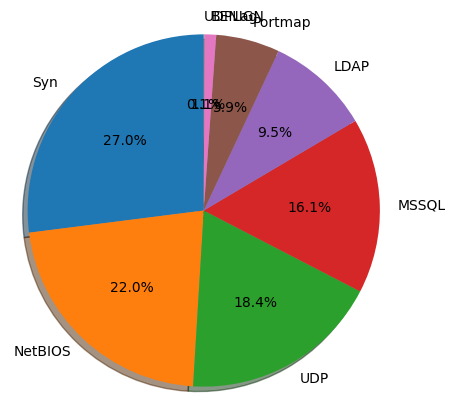

time: 959 ms (started: 2024-04-27 18:01:44 +00:00)


In [ ]:
label_df = pd.DataFrame(initial_df[' Label'].value_counts()).reset_index()
label_df.columns = ['Label', 'Count']  # Rename columns for clarity

y = label_df['Count'].values
mylabels = label_df['Label'].values
print(y)

# Pie chart
labels = mylabels
sizes = y
explode = (0, 0, 0, 0, 0, 0, 0, 0)  # Explode if needed

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()


# Sampling

In [ ]:
initial_df.head(20)

Unnamed: 0                                 Flow ID  \
./03-11/UDP.csv 0 0        15798   172.16.0.5-192.168.50.4-9401-15931-17   
                  1       110891   172.16.0.5-192.168.50.4-9402-29997-17   
                  2        66956   172.16.0.5-192.168.50.4-9403-29887-17   
                  3        66144    172.16.0.5-192.168.50.4-9404-7393-17   
                  4        72903   172.16.0.5-192.168.50.4-9405-57957-17   
                  5       104355   172.16.0.5-192.168.50.4-9406-13925-17   
                  6        31195   172.16.0.5-192.168.50.4-9407-64046-17   
                  7        44627   172.16.0.5-192.168.50.4-9408-43180-17   
                  8        90049   172.16.0.5-192.168.50.4-9409-40273-17   
                  9        47505   172.16.0.5-192.168.50.4-9410-10525-17   
                  10       75722   172.16.0.5-192.168.50.4-9411-57852-17   
                  11       65210   172.16.0.5-192.168.50.4-9412-44824-17   
                  12       44262  172.16.0.5-192.168.50.4-61850-35703-17   
                  13        3232   172.16.0.5-192.168.50.4-9413-20325-17   
                  14      104083   172.16.0.5-192.168.50.4-9414-64291-17   
                  15      112914   172.16.0.5-192.168.50.4-9415-56567-17   
                  16       71759    172.16.0.5-192.168.50.4-61850-819-17   
                  17       67789   172.16.0.5-192.168.50.4-9416-37136-17   
                  18      111031   172.16.0.5-192.168.50.4-9417-47250-17   
                  19       28018   172.16.0.5-192.168.50.4-9418-12944-17   

                       Source IP   Source Port  Destination IP  \
./03-11/UDP.csv 0 0   172.16.0.5          9401    192.168.50.4   
                  1   172.16.0.5          9402    192.168.50.4   
                  2   172.16.0.5          9403    192.168.50.4   
                  3   172.16.0.5          9404    192.168.50.4   
                  4   172.16.0.5          9405    192.168.50.4   
                  5   172.16.0.5          9406    192.168.50.4   
                  6   172.16.0.5          9407    192.168.50.4   
                  7   172.16.0.5          9408    192.168.50.4   
                  8   172.16.0.5          9409    192.168.50.4   
                  9   172.16.0.5          9410    192.168.50.4   
                  10  172.16.0.5          9411    192.168.50.4   
                  11  172.16.0.5          9412    192.168.50.4   
                  12  172.16.0.5         61850    192.168.50.4   
                  13  172.16.0.5          9413    192.168.50.4   
                  14  172.16.0.5          9414    192.168.50.4   
                  15  172.16.0.5          9415    192.168.50.4   
                  16  172.16.0.5         61850    192.168.50.4   
                  17  172.16.0.5          9416    192.168.50.4   
                  18  172.16.0.5          9417    192.168.50.4   
                  19  172.16.0.5          9418    192.168.50.4   

                       Destination Port   Protocol  \
./03-11/UDP.csv 0 0               15931         17   
                  1               29997         17   
                  2               29887         17   
                  3                7393         17   
                  4               57957         17   
                  5               13925         17   
                  6               64046         17   
                  7               43180         17   
                  8               40273         17   
                  9               10525         17   
                  10              57852         17   
                  11              44824         17   
                  12              35703         17   
                  13              20325         17   
                  14              64291         17   
                  15              56567         17   
                  16                819         17   
                  17              37136         17   
            

time: 106 ms (started: 2024-04-27 18:01:49 +00:00)


In [ ]:
print(initial_df.dtypes)

Unnamed: 0           int64
Flow ID             object
 Source IP          object
 Source Port         int64
 Destination IP     object
                    ...   
 Idle Max          float64
 Idle Min          float64
SimillarHTTP        object
 Inbound             int64
 Label              object
Length: 88, dtype: object
time: 6.3 ms (started: 2024-04-27 18:01:51 +00:00)


In [ ]:
print(initial_df.columns)

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [ ]:
import pandas as pd

attack_sample_df_dic = {}
labels = initial_df.iloc[:, -1].unique()

# Assuming 'initial_df' contains a column with labels at the last position
attack_df = initial_df[initial_df.iloc[:, -1] != 'BENIGN']

for label in labels:
    # Select 1500 rows for each label
    attack_sample_df_dic[label] = attack_df[attack_df.iloc[:, -1] == label][:1500]

# Concatenate the data frames in the dictionary
attack_sample_df = pd.concat(attack_sample_df_dic.values())

time: 12.9 s (started: 2024-04-27 18:01:56 +00:00)


this too og ig


In [ ]:
BINIGN_sample_df = initial_df[initial_df[' Label'] == 'BENIGN'][:10500]
# BINIGN_sample_df

time: 1.1 s (started: 2024-04-27 18:02:13 +00:00)


In [ ]:
#print(sampled_df_1.columns)

time: 452 µs (started: 2024-04-27 18:02:16 +00:00)


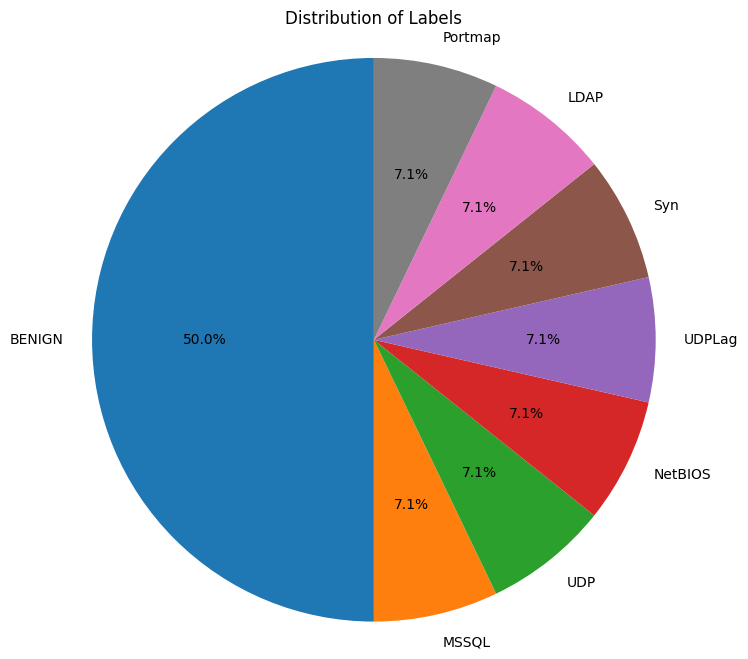

time: 432 ms (started: 2024-04-27 18:02:18 +00:00)


In [ ]:
import matplotlib.pyplot as plt

# Assuming sampled_df_1 has been defined previously and contains 'Label' column
# Assuming BINIGN_sample_df has been defined previously and contains 'Label' column

# Concatenate attack_sample_df and BINIGN_sample_df
sampled_df_1 = pd.concat([attack_sample_df, BINIGN_sample_df])

# Count occurrences of each label and create a DataFrame
label_counts = sampled_df_1.iloc[:, -1].value_counts()
label_df = pd.DataFrame({'Label': label_counts.index, 'Label_Count': label_counts.values})

# Extract label counts and labels
y = label_df['Label_Count'].values
mylabels = label_df['Label'].values

# Plotting the pie chart
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(y, labels=mylabels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title
ax1.set_title('Distribution of Labels')

plt.show()

In [ ]:
sampled_df_1 =  pd.concat([attack_sample_df, BINIGN_sample_df])
label_df = pd.DataFrame(sampled_df_1[' Label'].value_counts()).reset_index()
label_df

y = label_df[' Label'].values
mylabels = label_df['index'].values
print(y)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = mylabels
sizes = y
explode = (0, 0, 0, 0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


KeyError: 'index'

time: 347 ms (started: 2024-04-27 18:02:21 +00:00)


# Preprosse

In [ ]:
df = sampled_df_1.copy()

time: 39.2 ms (started: 2024-04-27 18:02:26 +00:00)


## Delete null and inf values

In [ ]:
df_1 = df.replace(np.inf, np.nan)
df_1.isnull().sum().sum()
# sns.heatmap(df_1 == np.nan)

546

time: 83.3 ms (started: 2024-04-27 18:02:28 +00:00)


In [ ]:
df_2 = df_1.dropna(axis=0)
df_2.isnull().sum().sum()

0

time: 73.8 ms (started: 2024-04-27 18:02:30 +00:00)


## Delete unchanged feature

In [ ]:
import pandas as pd

# Find columns with non-numeric values
non_numeric_cols = df_2.select_dtypes(exclude=['number']).columns

# Print the first few rows of each non-numeric column to identify the problematic data
for col in non_numeric_cols:
    print(f"Column: {col}")
    print(df_2[col].head())


Column: Flow ID
./03-11/UDP.csv  0  0    172.16.0.5-192.168.50.4-9401-15931-17
                    2    172.16.0.5-192.168.50.4-9403-29887-17
                    3     172.16.0.5-192.168.50.4-9404-7393-17
                    4    172.16.0.5-192.168.50.4-9405-57957-17
                    5    172.16.0.5-192.168.50.4-9406-13925-17
Name: Flow ID, dtype: object
Column:  Source IP
./03-11/UDP.csv  0  0    172.16.0.5
                    2    172.16.0.5
                    3    172.16.0.5
                    4    172.16.0.5
                    5    172.16.0.5
Name:  Source IP, dtype: object
Column:  Destination IP
./03-11/UDP.csv  0  0    192.168.50.4
                    2    192.168.50.4
                    3    192.168.50.4
                    4    192.168.50.4
                    5    192.168.50.4
Name:  Destination IP, dtype: object
Column:  Timestamp
./03-11/UDP.csv  0  0    2018-11-03 10:42:57.176671
                    2    2018-11-03 10:42:57.176727
                    3    2018-11-03

In [ ]:
import pandas as pd

# Find numeric columns in df_2
numeric_cols = df_2.select_dtypes(include='number').columns

# Compute the standard deviation of each numeric column in df_2
df_std = pd.DataFrame(df_2[numeric_cols].std(), columns=['value'])

# Identify columns with a standard deviation of 0
unchange_col = df_std[df_std['value'] == 0].index

# Drop columns with a standard deviation of 0 from df_2 and store the result in df_3
df_3 = df_2.drop(unchange_col, axis=1)


time: 117 ms (started: 2024-04-27 18:02:37 +00:00)


In [ ]:
df_std = pd.DataFrame(df_2.std(), columns = ['value'])
unchange_col = df_std[df_std['value'] == 0].index
df_3 = df_2.drop(unchange_col, axis=1)
df_3

TypeError: could not convert string to float: '172.16.0.5-192.168.50.4-9401-15931-17'

time: 115 ms (started: 2024-04-27 18:02:43 +00:00)


## Delete useless feature

In [ ]:
df_object = df_3.select_dtypes(include='object')
df_object.columns

Index(['Flow ID', ' Source IP', ' Destination IP', ' Timestamp',
       'SimillarHTTP', ' Label'],
      dtype='object')

time: 9.1 ms (started: 2024-04-27 18:02:46 +00:00)


In [ ]:
df_4 = df_3.drop(['Flow ID', ' Source IP', ' Destination IP'], axis=1)

time: 20.4 ms (started: 2024-04-27 18:02:48 +00:00)


In [ ]:
df_4[' Timestamp'].value_counts()

 Timestamp
2018-11-03 10:34:41.520937    2
2018-11-03 10:34:31.280962    2
2018-11-03 11:08:00.027971    2
2018-11-03 11:40:04.987018    2
2018-11-03 11:44:33.322910    2
                             ..
2018-11-03 11:29:17.849674    1
2018-11-03 11:29:17.849673    1
2018-11-03 11:29:17.849416    1
2018-11-03 11:29:17.849163    1
2018-11-03 12:30:15.619610    1
Name: count, Length: 20721, dtype: int64

time: 45.4 ms (started: 2024-04-27 18:02:50 +00:00)


In [ ]:
df_4.drop([' Timestamp'], axis=1, inplace = True)

time: 7.2 ms (started: 2024-04-27 18:02:52 +00:00)


In [ ]:
df_4['SimillarHTTP'].value_counts()

SimillarHTTP
0                                                                                     15422
0                                                                                      4976
ocsp.pki.goog/GTSGIAG3                                                                   68
ocsp.digicert.com/                                                                       46
ocsp.comodoca.com/                                                                       22
                                                                                      ...  
talebi.ca/wp-content/plugins/wpdiscuz/utils/captcha/captcha.php?key=c5bddb327c4b94        1
talebi.ca/wp-content/plugins/wpdiscuz/utils/captcha/captcha.php?key=c5bddb327c4e6c        1
2.gravatar.com/avatar/?s=48&d=mm&r=g                                                      1
en.drshno.com/wp-content/uploads/2015/12/sa2-1030x304.jpg                                 1
about.comenity.net/                                                

time: 10.8 ms (started: 2024-04-27 18:02:53 +00:00)


In [ ]:
df_4.drop(['SimillarHTTP'], axis=1, inplace = True)

time: 7.37 ms (started: 2024-04-27 18:02:55 +00:00)


In [ ]:
df_4.drop(['Unnamed: 0'], axis=1, inplace = True)

time: 7.77 ms (started: 2024-04-27 18:02:56 +00:00)


## Delete high corrolated feature

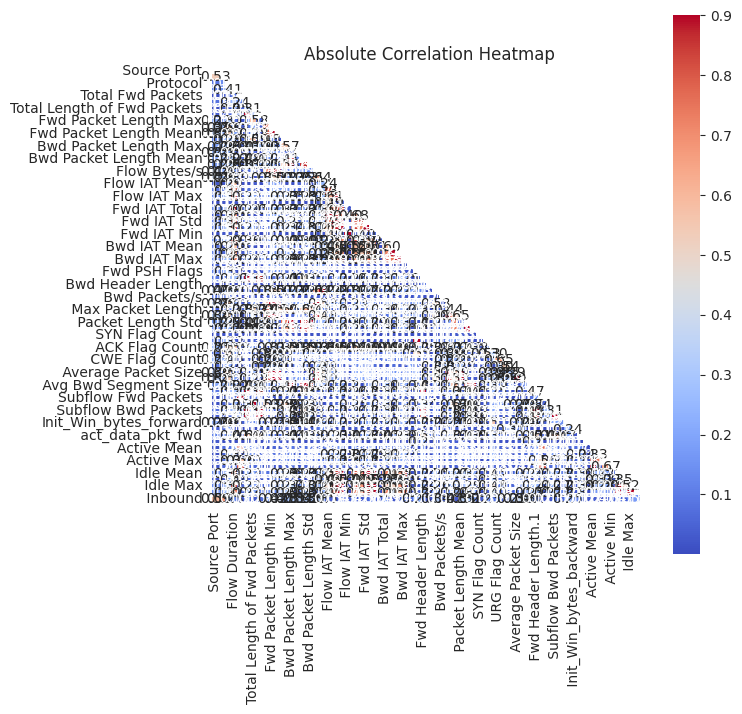

time: 8.8 s (started: 2024-04-27 18:02:59 +00:00)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure all columns contain numeric data
df_4_numeric = df_4.apply(pd.to_numeric, errors='coerce')

# Drop columns with NaN values (caused by non-numeric strings that couldn't be converted)
df_4_numeric = df_4_numeric.dropna(axis=1)

# Compute the absolute correlation matrix
df_corr = df_4_numeric.corr().abs()

# Set the diagonal values to 1 (optional, as correlation with itself is always 1)
np.fill_diagonal(df_corr.values, 1)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Create a heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(df_corr, mask=mask, vmax=0.9, square=True, cmap='coolwarm', annot=True, fmt=".2f", ax=ax)
    plt.title('Absolute Correlation Heatmap')
    plt.show()


In [ ]:
df_corr = df_4.corr().abs()
corr_val = df_corr.values
corr_val[1][1] = 1
mask = np.zeros_like(corr_val)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(corr_val, mask=mask, vmax=0.9, square=True)

ValueError: could not convert string to float: 'MSSQL'

time: 32.3 ms (started: 2024-04-27 18:03:10 +00:00)


time: 2.11 s (started: 2024-04-27 18:03:10 +00:00)


In [ ]:
high_corr = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(bool))

time: 4.92 ms (started: 2024-04-27 18:03:14 +00:00)


In [ ]:
to_drop = [column for column in high_corr.columns if any(high_corr[column] > 0.90)]
to_drop

[' Total Length of Bwd Packets',
 ' Fwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Fwd Header Length',
 'Fwd Packets/s',
 ' Min Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' RST Flag Count',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 ' Fwd Header Length.1',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Bwd Bytes',
 ' Active Min',
 'Idle Mean',
 ' Idle Max',
 ' Idle Min']

time: 32.9 ms (started: 2024-04-27 18:03:16 +00:00)


In [ ]:
df_5 = df_4.drop(to_drop, axis=1)
df_5

Source Port   Destination Port   Protocol  \
./03-11/UDP.csv 0 0               9401              15931         17   
                  2               9403              29887         17   
                  3               9404               7393         17   
                  4               9405              57957         17   
                  5               9406              13925         17   
...                                ...                ...        ...   
./03-11/Syn.csv 0 482147         61067                443          6   
                  482148           443              61067          6   
                  482149         61070                443          6   
                  482150         61072                443          6   
                  482151           443              61070          6   

                           Flow Duration   Total Fwd Packets  \
./03-11/UDP.csv 0 0                    1                   2   
                  2                    1                   2   
                  3                    1                   2   
                  4                    1                   2   
                  5                    1                   2   
...                                  ...                 ...   
./03-11/Syn.csv 0 482147               1                   2   
                  482148             339                   3   
                  482149               9                   2   
                  482150               1                   2   
                  482151             499                   3   

                           Total Backward Packets  \
./03-11/UDP.csv 0 0                             0   
                  2                             0   
                  3                             0   
                  4                             0   
                  5                             0   
...                                           ...   
./03-11/Syn.csv 0 482147                        0   
                  482148                        2   
                  482149                        0   
                  482150                        0   
                  482151                        2   

                          Total Length of Fwd Packets   Fwd Packet Length Max  \
./03-11/UDP.csv 0 0                            2560.0                  1280.0   
                  2                             810.0                   405.0   
                  3                             852.0                   426.0   
                  4                            1240.0                   620.0   
                  5                            1064.0                   532.0   
...                                               ...                     ...   
./03-11/Syn.csv 0 482147                         37.0                    31.0   
                  482148                         82.0                    38.0   
                  482149                         37.0                    31.0   
                  482150                         37.0                    31.0   
                  482151                         82.0                    38.0   

                           Fwd Packet Length Min   Fwd Packet Length Std  ...  \
./03-11/UDP.csv 0 0                       1280.0                0.000000  ...   
                  2                        405.0                0.000000  ...   
                  3                        426.0                0.000000  ...   
                  4                        620.0                0.000000  ...   
                  5                        532.0                0.000000  ...   
...                                          ...                     ...  ...   
./03-11/Syn.csv 0 482147                     6.0               17.677670  ...   
                  482148                     6.0               18.475209  ...   
                  482149                     6.0      

time: 111 ms (started: 2024-04-27 18:03:19 +00:00)


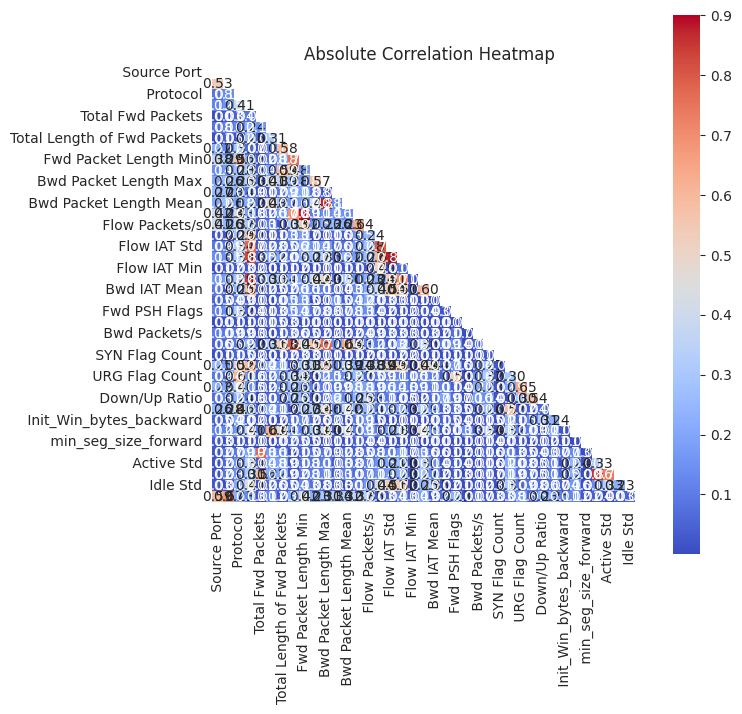

time: 3.88 s (started: 2024-04-27 18:03:21 +00:00)


In [ ]:
# Ensure all columns contain numeric data
df_5_numeric = df_5.apply(pd.to_numeric, errors='coerce')

# Drop columns with NaN values (caused by non-numeric strings that couldn't be converted)
df_5_numeric = df_5_numeric.dropna(axis=1)

# Compute the absolute correlation matrix
df_corr = df_5_numeric.corr().abs()

# Set the diagonal values to 1 (optional, as correlation with itself is always 1)
np.fill_diagonal(df_corr.values, 1)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Create a heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(df_corr, mask=mask, vmax=0.9, square=True, cmap='coolwarm', annot=True, fmt=".2f", ax=ax)
    plt.title('Absolute Correlation Heatmap')
    plt.show()


In [ ]:
df_corr = df_5.corr().abs()
corr_val = df_corr.values
corr_val[1][1] = 1
mask = np.zeros_like(corr_val)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(corr_val, mask=mask, vmax=0.9, square=True)

ValueError: could not convert string to float: 'MSSQL'

time: 52.6 ms (started: 2024-04-27 18:03:29 +00:00)


In [ ]:
df_corr.loc[1, 1] = 1

time: 7.72 ms (started: 2024-04-27 18:03:34 +00:00)


Delete feature whith many nagative value

<Axes: >

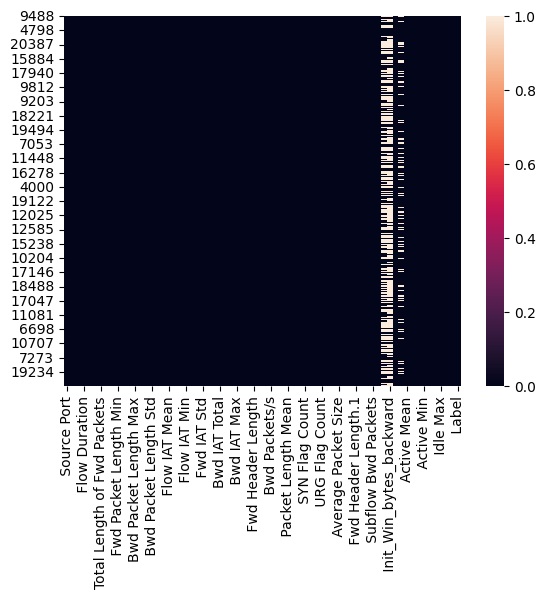

time: 4.23 s (started: 2024-04-27 18:03:37 +00:00)


In [ ]:
df_5 = df_4.reset_index(drop=True)

# Sample the DataFrame to shuffle the rows
df_5 = df_5.sample(frac=1)

# Create a heatmap indicating where values are equal to -1
sns.heatmap(df_5 == -1)

In [ ]:
df_5 = df_4.reset_index()
df_5 = df_5.drop(['index'], axis = 1)
df_5 = df_5.sample(frac = 1)
sns.heatmap(df_5 == -1)

KeyError: "['index'] not found in axis"

time: 36.8 ms (started: 2024-04-27 18:03:44 +00:00)


In [ ]:
negative_df = df_5 == -1
number_of_negative_df = pd.DataFrame(negative_df.sum(), columns = ['count']).reset_index()
df_size = len(df_5)
to_drop = number_of_negative_df[number_of_negative_df['count'] > 1]['index'].values


df_6 = df_5.drop(to_drop, axis = 1)
df_6 = df_6.reset_index()
df_6 = df_6.drop(['index'], axis = 1)
df_6 = df_6.sample(frac = 1)

time: 61.3 ms (started: 2024-04-27 18:03:47 +00:00)


Delete feature whith more than 85% zero value

<Axes: >

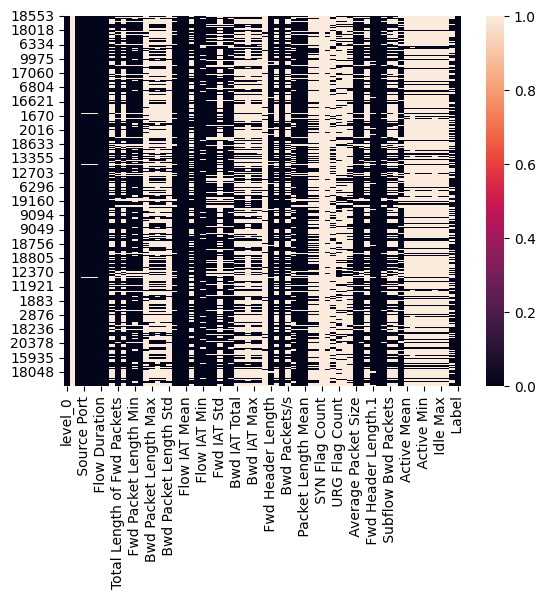

time: 3.93 s (started: 2024-04-27 18:03:50 +00:00)


In [ ]:
sns.heatmap(df_6 == 0)

In [ ]:
zero_df = df_6 == 0
number_of_zero_df = pd.DataFrame(zero_df.sum(), columns = ['count']).reset_index()
df_size = len(df_6)
to_drop = number_of_zero_df[number_of_zero_df['count'] > (df_size * 0.85)]['index']
df_7 = df_6.drop(to_drop, axis = 1)

time: 36.1 ms (started: 2024-04-27 18:03:58 +00:00)


In [ ]:
df_8 = df_7.copy()
df_8.columns

Index(['level_0', 'level_2', ' Source Port', ' Destination Port', ' Protocol',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', ' ACK Flag Count',
       ' URG Flag Count', ' Down/Up

time: 13.8 ms (started: 2024-04-27 18:04:00 +00:00)


## Shuffle dataframe

In [ ]:
df_9 = df_8.sample(frac = 1)
df_9

,level_0,level_2,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,...,Subflow Bwd Bytes,act_data_pkt_fwd,Active Mean,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Inbound,Label
13195,./03-11/UDPLag.csv,113347,60565,80,6,7332943,2,8,0.0,0.0,...,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0,BENIGN
18461,./03-11/Syn.csv,478225,49300,53,17,21330,2,2,60.0,92.0,...,92,1,0.000000,0.0,0.0,0.0,0.0,0.0,0,BENIGN
6512,./03-11/UDPLag.csv,118886,51599,51599,6,66205789,14,6,84.0,36.0,...,36,13,60.166667,111.0,1.0,11034230.0,21019830.0,6038544.0,1,Syn
5173,./03-11/UDPLag.csv,115424,52002,19480,17,4,2,0,754.0,0.0,...,0,1,0.000000,0.0,0.0,0.0,0.0,0.0,0,UDPLag
1932,./03-11/UDP.csv,26278,61850,42193,17,2,2,0,884.0,0.0,...,0,1,0.000000,0.0,0.0,0.0,0.0,0.0,1,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15874,./03-11/UDPLag.csv,118130,32882,443,6,2,2,0,0.0,0.0,...,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0,BENIGN
9667,./03-11/Portmap.csv,3491,63407,7547,6,99,2,2,12.0,12.0,...,12,1,0.000000,0.0,0.0,0.0,0.0,0.0,1,Portmap
13847,./03-11/UDPLag.csv,114449,55923,443,6,119229279,70,87,8780.0,60954.0,...,60954,68,807037.500000,1551767.0,62308.0,58776470.0,58962474.0,58590466.0,0,BENIGN
20392,./03-11/Syn.csv,481396,46494,443,6,319,4,0,123.0,0.0,...,0,2,0.000000,0.0,0.0,0.0,0.0,0.0,0,BENIGN


time: 58.4 ms (started: 2024-04-27 18:04:03 +00:00)


<Axes: >

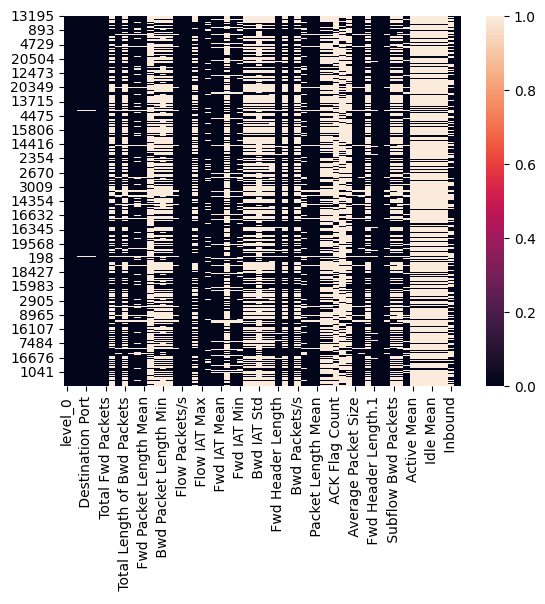

time: 3.95 s (started: 2024-04-27 18:04:05 +00:00)


In [ ]:
sns.heatmap(df_9 == 0)

Encoding categorical data

In [ ]:
df_10 = pd.get_dummies(df_9, columns = [' Protocol'])
df_10

,level_0,level_2,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,Active Max,Active Min,Idle Mean,Idle Max,Idle Min,Inbound,Label,Protocol_0,Protocol_6,Protocol_17
13195,./03-11/UDPLag.csv,113347,60565,80,7332943,2,8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,BENIGN,False,True,False
18461,./03-11/Syn.csv,478225,49300,53,21330,2,2,60.0,92.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0,BENIGN,False,False,True
6512,./03-11/UDPLag.csv,118886,51599,51599,66205789,14,6,84.0,36.0,6.0,...,111.0,1.0,11034230.0,21019830.0,6038544.0,1,Syn,False,True,False
5173,./03-11/UDPLag.csv,115424,52002,19480,4,2,0,754.0,0.0,377.0,...,0.0,0.0,0.0,0.0,0.0,0,UDPLag,False,False,True
1932,./03-11/UDP.csv,26278,61850,42193,2,2,0,884.0,0.0,442.0,...,0.0,0.0,0.0,0.0,0.0,1,UDP,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15874,./03-11/UDPLag.csv,118130,32882,443,2,2,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,BENIGN,False,True,False
9667,./03-11/Portmap.csv,3491,63407,7547,99,2,2,12.0,12.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1,Portmap,False,True,False
13847,./03-11/UDPLag.csv,114449,55923,443,119229279,70,87,8780.0,60954.0,1213.0,...,1551767.0,62308.0,58776470.0,58962474.0,58590466.0,0,BENIGN,False,True,False
20392,./03-11/Syn.csv,481396,46494,443,319,4,0,123.0,0.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0,BENIGN,False,True,False


time: 71 ms (started: 2024-04-27 18:04:13 +00:00)


In [ ]:
destination_port_df = pd.DataFrame(df_10[' Destination Port'].value_counts())
dp_df_size = len(destination_port_df)
unmost_port = destination_port_df.tail(dp_df_size - 10).index
df_11 = df_10.copy()
df_11 = df_10.replace(to_replace = unmost_port, value =99999)
df_11 = pd.get_dummies(df_11, columns = [' Destination Port'])
df_11

,level_0,level_2,Source Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Destination Port_21,Destination Port_22,Destination Port_53,Destination Port_80,Destination Port_137,Destination Port_443,Destination Port_465,Destination Port_5355,Destination Port_33434,Destination Port_99999
13195,./03-11/UDPLag.csv,113347,60565,7332943,2,8,0.0,0.0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,False
18461,./03-11/Syn.csv,478225,49300,21330,2,2,99999.0,92.0,30.0,30.0,...,False,False,True,False,False,False,False,False,False,False
6512,./03-11/UDPLag.csv,118886,99999,66205789,99999,6,84.0,36.0,6.0,6.0,...,False,False,False,False,False,False,False,False,False,True
5173,./03-11/UDPLag.csv,115424,52002,4,2,0,754.0,0.0,377.0,377.0,...,False,False,False,False,False,False,False,False,False,True
1932,./03-11/UDP.csv,26278,99999,2,2,0,884.0,0.0,442.0,442.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15874,./03-11/UDPLag.csv,118130,99999,2,2,0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,True,False,False,False,False
9667,./03-11/Portmap.csv,3491,99999,99,2,2,12.0,12.0,6.0,6.0,...,False,False,False,False,False,False,False,False,False,True
13847,./03-11/UDPLag.csv,114449,99999,119229279,70,99999,8780.0,99999.0,99999.0,0.0,...,False,False,False,False,False,True,False,False,False,False
20392,./03-11/Syn.csv,481396,99999,319,4,0,99999.0,0.0,46.0,0.0,...,False,False,False,False,False,True,False,False,False,False


time: 1min 29s (started: 2024-04-27 18:04:18 +00:00)


In [ ]:
Source_Port_df = pd.DataFrame(df_11[' Source Port'].value_counts())
sp_df_size = len(Source_Port_df)
unmost_port = Source_Port_df.tail(sp_df_size - 10).index
df_12 = df_11.copy()
df_12[' Source Port'] = df_11[' Source Port'].replace(to_replace = unmost_port, value =99999)
df_12 = pd.get_dummies(df_12, columns = [' Source Port'])
df_12

,level_0,level_2,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Source Port_0,Source Port_22,Source Port_80,Source Port_443,Source Port_523,Source Port_623,Source Port_900,Source Port_41077,Source Port_52312,Source Port_99999
13195,./03-11/UDPLag.csv,113347,7332943,2,8,0.0,0.0,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,True
18461,./03-11/Syn.csv,478225,21330,2,2,99999.0,92.0,30.0,30.0,30.000000,...,False,False,False,False,False,False,False,False,False,True
6512,./03-11/UDPLag.csv,118886,66205789,99999,6,84.0,36.0,6.0,6.0,6.000000,...,False,False,False,False,False,False,False,False,False,True
5173,./03-11/UDPLag.csv,115424,4,2,0,754.0,0.0,377.0,377.0,377.000000,...,False,False,False,False,False,False,False,False,False,True
1932,./03-11/UDP.csv,26278,2,2,0,884.0,0.0,442.0,442.0,442.000000,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15874,./03-11/UDPLag.csv,118130,2,2,0,0.0,0.0,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,True
9667,./03-11/Portmap.csv,3491,99,2,2,12.0,12.0,6.0,6.0,6.000000,...,False,False,False,False,False,False,False,False,False,True
13847,./03-11/UDPLag.csv,114449,119229279,70,99999,8780.0,99999.0,99999.0,0.0,125.428571,...,False,False,False,False,False,False,False,False,False,True
20392,./03-11/Syn.csv,481396,319,4,0,99999.0,0.0,46.0,0.0,30.750000,...,False,False,False,False,False,False,False,False,False,True


time: 1.04 s (started: 2024-04-27 18:05:48 +00:00)


Z-Score normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify non-numeric columns
non_numeric_columns = df_12.select_dtypes(exclude=['number']).columns

# Remove non-numeric columns and perform z-score normalization
numeric_columns = df_12.drop(non_numeric_columns, axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Create a DataFrame with scaled data
df_13 = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# Add back non-numeric columns
for col in non_numeric_columns:
    df_13[col] = df_12[col]

# Print the resulting DataFrame df_13
print(df_13)


        level_2   Flow Duration   Total Fwd Packets   Total Backward Packets  \
0     -0.187224       -0.133166           -0.165754                -0.149440   
1      1.941319       -0.387686           -0.165754                -0.149850   
2     -0.154912        1.916221            6.045202                -0.149576   
3     -0.175107       -0.388429           -0.165754                -0.149986   
4     -0.695147       -0.388429           -0.165754                -0.149986   
...         ...             ...                 ...                      ...   
20722 -0.159322       -0.388429           -0.165754                -0.149986   
20723 -0.828077       -0.388425           -0.165754                -0.149850   
20724 -0.180795        3.761990           -0.161531                 6.682353   
20725  1.959817       -0.388418           -0.165630                -0.149986   
20726 -0.168778       -0.388429           -0.165754                -0.149986   

       Total Length of Fwd Packets   To

In [ ]:
df_13 = z_score(df_12.drop([' Label'], axis = 1))
df_13[' Label'] = df_12[' Label']
df_13

TypeError: Could not convert ./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/MSSQL.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/NetBIOS.csv./03-11/MSSQL.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDP.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/MSSQL.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/NetBIOS.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/Syn.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/UDPLag.csv./03-11/UDP.csv./03-11/Syn.csv./03-11/UDPLag.csv./03-11/Portmap.csv./03-11/UDPLag.csv./03-11/Syn.csv./03-11/UDPLag.csv to numeric

time: 251 ms (started: 2024-04-27 18:05:51 +00:00)


# Predict

In [ ]:
final_df = df_13.copy()
final_df[' Label'].value_counts()
final_01_df=final_df.copy()

time: 37.1 ms (started: 2024-04-27 18:05:55 +00:00)


### Detect Attack or not

K-Fold Decision Tree: 
k0 - accuracy: 0.30390738060781475
k1 - accuracy: 0.7274481427882297
k2 - accuracy: 0.25180897250361794
k3 - accuracy: 0.9194404245055475
k4 - accuracy: 0.2783405692233478
k5 - accuracy: 0.984081041968162
k6 - accuracy: 0.989387361312108
k7 - accuracy: 0.9927606177606177
k8 - accuracy: 0.999034749034749
k9 - accuracy: 0.9975868725868726

Avg accuracy : 0.7443796132291066

General Decision Tree: 
accuracy: 0.9105965589323042


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3081
           1       1.00      0.99      0.99       451
           2       0.48      0.50      0.49       435
           3       1.00      1.00      1.00       408
           4       0.99      1.00      1.00       448
           5       0.93      0.92      0.92       468
           6       0.52      0.50      0.51       472
           7       0.91      0.93      0.92       456

    accuracy                           0.91      6219
   ma

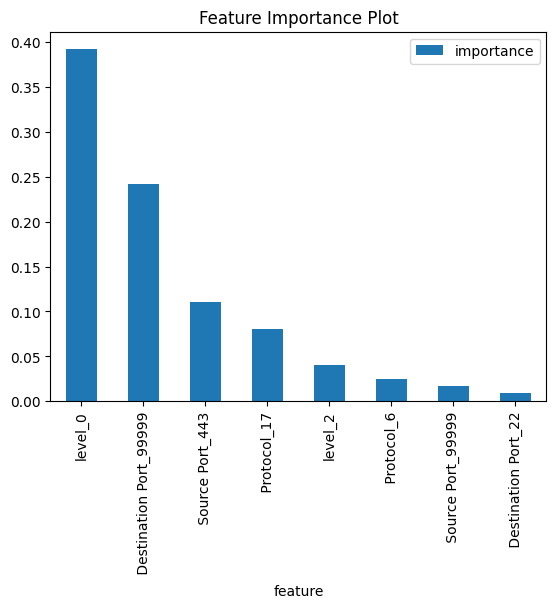

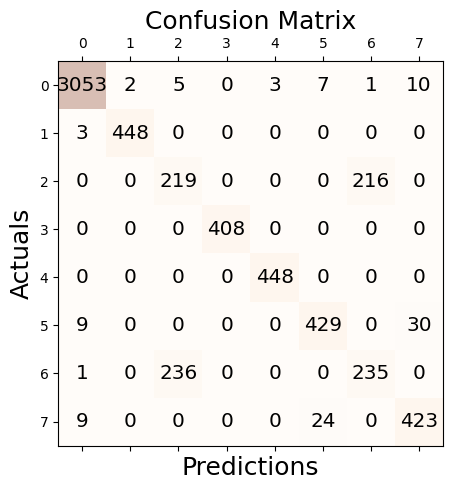

0.9105965589323042

time: 7.54 s (started: 2024-04-27 18:05:59 +00:00)


In [ ]:
# Step 1: Identify non-numeric columns
non_numeric_columns = final_01_df.select_dtypes(exclude=['number']).columns

# Step 2: Handle non-numeric values
# For example, you can use label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    final_01_df[col] = label_encoder.fit_transform(final_01_df[col])

# Step 3: Ensure all columns used for training are numeric
X = final_01_df.drop([' Label'], axis=1)
y = final_01_df[' Label']

# Now, you can proceed with training your decision tree model
DecisionTree(X, y)


### Detect what kind of attack or BENIGN

K-Fold Decision Tree: 
k0 - accuracy: 0.30101302460202606
k1 - accuracy: 0.7240713941148095
k2 - accuracy: 0.2522913651712494
k3 - accuracy: 0.9204052098408104
k4 - accuracy: 0.2783405692233478
k5 - accuracy: 0.984081041968162
k6 - accuracy: 0.9884225759768451
k7 - accuracy: 0.9898648648648649
k8 - accuracy: 0.999034749034749
k9 - accuracy: 0.9975868725868726

Avg accuracy : 0.7435111667383737

General Decision Tree: 
accuracy: 0.9118829393793214


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3081
           1       1.00      0.99      0.99       451
           2       0.48      0.52      0.50       435
           3       1.00      1.00      1.00       408
           4       1.00      1.00      1.00       448
           5       0.94      0.92      0.93       468
           6       0.52      0.48      0.50       472
           7       0.92      0.93      0.92       456

    accuracy                           0.91      6219
   ma

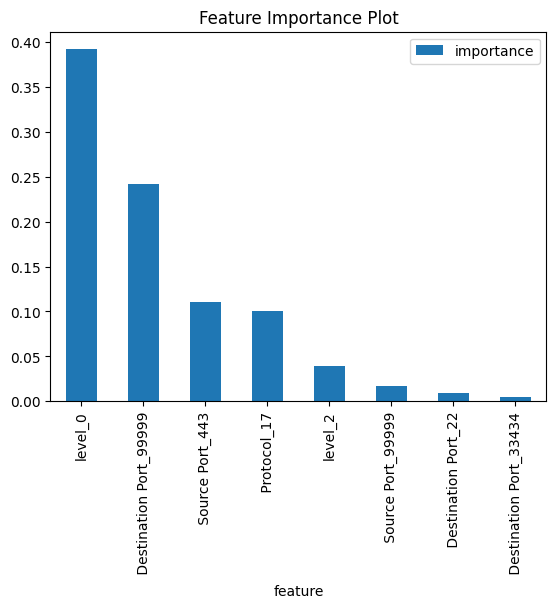

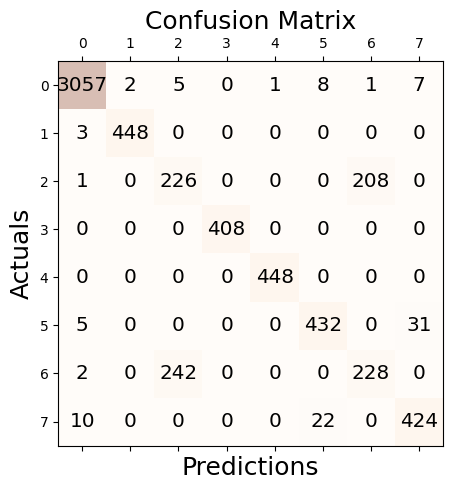

0.9118829393793214

time: 7.16 s (started: 2024-04-27 18:06:11 +00:00)


In [ ]:
# Step 1: Identify non-numeric columns
non_numeric_columns = final_df.select_dtypes(exclude=['number']).columns

# Step 2: Handle non-numeric values
# For example, you can use label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    final_df[col] = label_encoder.fit_transform(final_df[col])

# Step 3: Ensure all columns used for training are numeric
X = final_df.drop([' Label'], axis=1)
y = final_df[' Label']

# Now, you can proceed with training your decision tree model
DecisionTree(X, y)


Random Forest Model

              precision    recall  f1-score   support

        True       1.00      1.00      1.00      6219

    accuracy                           1.00      6219
   macro avg       1.00      1.00      1.00      6219
weighted avg       1.00      1.00      1.00      6219



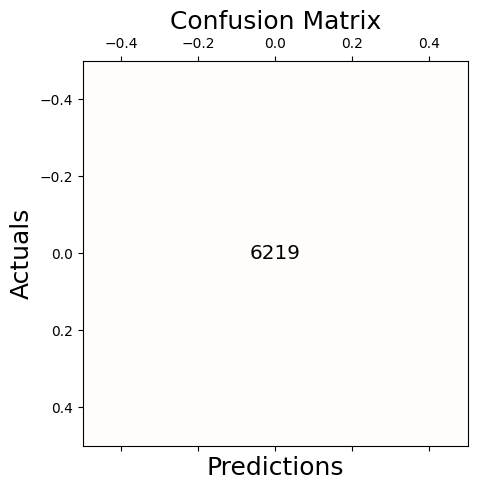

<Axes: title={'center': 'Feature Importance Plot'}>

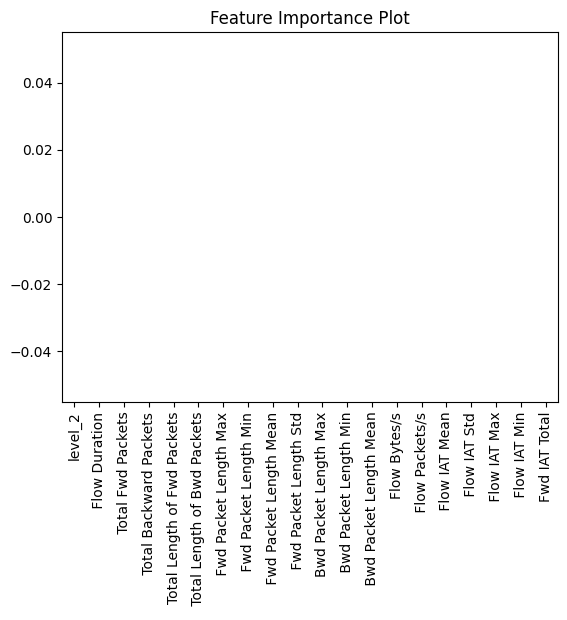

time: 1.82 s (started: 2024-04-27 18:06:20 +00:00)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# X = final_df.drop([' Label'], axis = 1)
# y = final_df[' Label']
final_01_df = final_df.copy()
final_01_df[' Label'] = final_df[' Label'] != 'BENIGN'

X = final_01_df.drop([' Label'], axis = 1)
y = final_01_df[' Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

rf_model = rf.fit(X, y)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test,y_pred))

visualize_confusion_matrix(y_true=y_test, y_pred=y_pred)

feature_importance_std = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Feature Importance Plot')

KNN Model

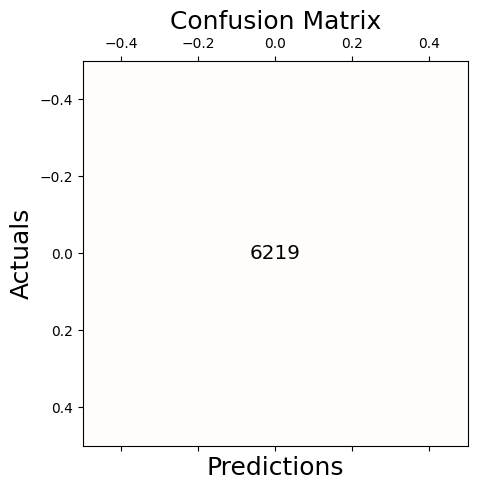

              precision    recall  f1-score   support

        True       1.00      1.00      1.00      6219

    accuracy                           1.00      6219
   macro avg       1.00      1.00      1.00      6219
weighted avg       1.00      1.00      1.00      6219

time: 2.39 s (started: 2024-04-27 18:17:48 +00:00)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

final_01_df = final_df.copy()
final_01_df[' Label'] = final_df[' Label'] != 'BENIGN'

X = final_01_df.drop([' Label'], axis = 1)
y = final_01_df[' Label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


knn = KNeighborsClassifier(n_neighbors=8)
knn_model = knn.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)
visualize_confusion_matrix(y_true=y_test, y_pred=y_pred)
print(classification_report(y_test,y_pred))

Uses of the Invention and Different Ways to Achieve Desired Results:

Secure Transmission of Sensitive Documents: The primary use of this invention is to ensure the secure transmission of sensitive personal identification documents such as Aadhar cards, PAN cards, and driving licenses through digital channels. This involves safeguarding these documents from unauthorized access, visual capture, and data interception during the transmission process.

Prevention of Unauthorized Access: By employing encryption using state-of-the-art cryptographic techniques, the invention ensures that only authorized parties can access the transmitted documents.

Protection Against Visual Capture: Computer vision-based obfuscation methods can be utilized to distort the visual representation of the documents, making it difficult for unauthorized parties to capture meaningful information.

Mitigation of Data Interception: Integration of machine learning and deep learning models can help detect and prevent data interception attempts during transmission, thereby ensuring the integrity and confidentiality of the documents.

Enhancing Data Privacy and Security: The invention contributes to enhancing data privacy and security by addressing contemporary challenges in confidential document transmission and establishing a proactive defense against evolving security threats.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize kNN and Random Forest classifiers
knn_clf = KNeighborsClassifier(n_neighbors=5)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize AdaBoost classifier with a decision tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train kNN and Random Forest classifiers
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Train AdaBoost classifier on top of kNN and Random Forest classifiers
adaboost_clf.fit(X_train, y_train)

# Make predictions using each model


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

time: 853 ms (started: 2024-04-27 18:18:04 +00:00)


In [ ]:
knn_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("kNN Accuracy:", knn_accuracy)

kNN Accuracy: 0.81
time: 77.9 ms (started: 2024-04-27 18:18:12 +00:00)


In [ ]:

rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9
time: 32.3 ms (started: 2024-04-27 18:18:15 +00:00)


In [ ]:

adaboost_pred = adaboost_clf.predict(X_test)

# Calculate accuracy for each model

adaboost_accuracy = accuracy_score(y_test, adaboost_pred)


print("AdaBoost Accuracy:", adaboost_accuracy)


AdaBoost Accuracy: 0.87
time: 26 ms (started: 2024-04-27 18:18:17 +00:00)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize kNN and Random Forest classifiers
knn_clf = KNeighborsClassifier(n_neighbors=5)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=40)

# Specify a base estimator (e.g., Decision Tree) for AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost classifier with the specified base estimator
adaboost_clf = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=25, random_state=42)

# Train kNN and Random Forest classifiers
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Train AdaBoost classifier on top of kNN and Random Forest classifiers
adaboost_clf.fit(X_train, y_train)

# Make predictions using each model



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=25, random_state=42)

time: 2.09 s (started: 2024-04-27 18:21:43 +00:00)


In [ ]:
knn_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("kNN Accuracy:", knn_accuracy)

kNN Accuracy: 0.81
time: 263 ms (started: 2024-04-27 18:21:47 +00:00)


In [ ]:
adaboost_pred = adaboost_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.895
time: 25.6 ms (started: 2024-04-27 18:21:50 +00:00)


In [ ]:
rf_pred = rf_clf.predict(X_test)

# Calculate accuracy for each model
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)


print("AdaBoost Accuracy:", adaboost_accuracy)


AdaBoost Accuracy: 0.865
time: 18.4 ms (started: 2024-04-27 18:21:52 +00:00)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your preprocessed data and split it into features (X) and labels (y)
# Assuming final_01_df is your preprocessed DataFrame containing features and binary labels

X = final_01_df.drop([' Label'], axis=1)
y = final_01_df[' Label']

# Split the dataset into training and testing sets
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

# Initialize kNN model
knn = KNeighborsClassifier(n_neighbors=8)

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit individual models
knn.fit(x_train, y_train)
rf.fit(x_train, y_train)

# Predictions of individual models





RandomForestClassifier(n_estimators=1000, random_state=42)

time: 4.28 s (started: 2024-04-27 18:27:00 +00:00)


In [ ]:
y_pred_knn = knn.predict(x_test)
print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))

kNN Accuracy: 0.835
time: 97.7 ms (started: 2024-04-27 18:27:09 +00:00)


In [ ]:
y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.86
time: 164 ms (started: 2024-04-27 18:27:14 +00:00)


In [ ]:
# Weighted Averaging
weighted_avg_pred = (y_pred_knn + y_pred_rf) / 2  # Equal weights for simplicity

# Convert predictions to binary (assuming labels are binary)
weighted_avg_pred_binary = np.where(weighted_avg_pred >= 0.5, 1, 0)

# Combine predictions using Voting Classifier
voting_pred = np.array([y_pred_knn, y_pred_rf, weighted_avg_pred_binary])
final_pred = np.mean(voting_pred, axis=0)

# Convert final predictions to binary (assuming labels are binary)
final_pred_binary = np.where(final_pred >= 0.5, 1, 0)

# Compare performances

print("Weighted Averaging Accuracy:", accuracy_score(y_test, weighted_avg_pred_binary))
print("Final Model Accuracy:", accuracy_score(y_test, final_pred_binary))


Weighted Averaging Accuracy: 0.855
Final Model Accuracy: 0.855
time: 12 ms (started: 2024-04-27 18:27:23 +00:00)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your preprocessed data and split it into features (X) and labels (y)
# Assuming final_01_df is your preprocessed DataFrame containing features and binary labels

X = final_01_df.drop([' Label'], axis=1)
y = final_01_df[' Label']

# Split the dataset into training and testing sets
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

# Initialize kNN model with regularization
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')  # Adjust n_neighbors and weights as needed

# Initialize Random Forest model with regularization
rf = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Fit individual models
knn.fit(x_train, y_train)
rf.fit(x_train, y_train)

# Predictions of individual models
y_pred_knn = knn.predict(x_test)
y_pred_rf = rf.predict(x_test)

# Weighted Averaging
weighted_avg_pred = (y_pred_knn + y_pred_rf) / 2  # Equal weights for simplicity

# Convert predictions to binary (assuming labels are binary)
weighted_avg_pred_binary = np.where(weighted_avg_pred >= 0.5, 1, 0)

# Combine predictions using Voting Classifier
voting_pred = np.array([y_pred_knn, y_pred_rf, weighted_avg_pred_binary])
final_pred = np.mean(voting_pred, axis=0)

# Convert final predictions to binary (assuming labels are binary)
final_pred_binary = np.where(final_pred >= 0.5, 1, 0)

# Compare performances
print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Weighted Averaging Accuracy:", accuracy_score(y_test, weighted_avg_pred_binary))
print("Final Model Accuracy:", accuracy_score(y_test, final_pred_binary))


kNN Accuracy: 0.82
Random Forest Accuracy: 0.88
Weighted Averaging Accuracy: 0.83
Final Model Accuracy: 0.83
time: 544 ms (started: 2024-04-27 18:06:56 +00:00)


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Load your preprocessed data and split it into features (X) and labels (y)
# Assuming final_01_df is your preprocessed DataFrame containing features and binary labels

X = final_01_df.drop([' Label'], axis=1)
y = final_01_df[' Label']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Initialize kNN model
knn = KNeighborsClassifier(n_neighbors=8)

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit individual models
knn.fit(x_train, y_train)
rf.fit(x_train, y_train)

# Predictions of individual models
y_pred_knn = knn.predict(x_test)
y_pred_rf = rf.predict(x_test)

# Weighted Averaging
weighted_avg_pred = (y_pred_knn + y_pred_rf) / 2  # Equal weights for simplicity

# Convert predictions to binary (assuming labels are binary)
weighted_avg_pred_binary = np.where(weighted_avg_pred >= 0.5, 1, 0)

# Initialize AdaBoost classifier
adaboost_clf = AdaBoostClassifier(base_estimator=None, n_estimators=50, random_state=42)

# Train AdaBoost on top of kNN and Random Forest predictions
adaboost_clf.fit(np.column_stack((y_pred_knn, y_pred_rf)), y_test)

# Make predictions using the AdaBoost classifier
y_pred_adaboost = adaboost_clf.predict(np.column_stack((y_pred_knn, y_pred_rf)))

# Combine predictions using Voting Classifier
voting_pred = np.array([y_pred_knn, y_pred_rf, y_pred_adaboost, weighted_avg_pred_binary])
final_pred = np.mean(voting_pred, axis=0)

# Convert final predictions to binary (assuming labels are binary)
final_pred_binary = np.where(final_pred >= 0.5, 1, 0)

# Compare performances
print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("Weighted Averaging Accuracy:", accuracy_score(y_test, weighted_avg_pred_binary))
print("Final Model Accuracy:", accuracy_score(y_test, final_pred_binary))

# You can also print classification reports if needed


InvalidParameterError: The 'base_estimator' parameter of AdaBoostClassifier must be an object implementing 'fit' and 'predict' or a str among {'deprecated'}. Got None instead.

time: 2.18 s (started: 2024-04-27 18:07:02 +00:00)


In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 377 µs (started: 2024-04-27 17:58:46 +00:00)
